# MNIST Playground - Unsupervised Learning

UNAP is not installed per default in Google Colab. Install according to the description found in [UMAP GitHub](https://github.com/lmcinnes/umap). UMAP documentation can be found here: [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html#).

In [1]:
# install umap
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6654fab16f3119bb1f8866c71c111b6ae1e711bb897737628325c80fde55cd30
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [43]:
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import umap

Set `random_state` to be used thoughout this notebook. In addition set a `sample_size` used to select uniform random sample from the 70,000 images in MNIST 784. The full dataset is probably not needed in all cases.

In [3]:
random_state = 842
sample_size = 10000

## Fetch and prepare the MNIST 784 dataset  

Fetch the MNIST 784 dataset from OpenML Datasets (https://www.openml.org/) using the `fetch_openml` function provided by sklearn. Extract the data and the class labels from the dataset and do some basic checks.

In [4]:
X, y = fetch_openml(name='mnist_784', return_X_y=True, as_frame=False, parser='auto')
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"All targets: {np.unique(y)}")

Data shape: (70000, 784)
Target shape: (70000,)
All targets: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Normalize grey-scale pixel values `X` and turn targets (class values) into `int to be used as matplotlib color values.

In [5]:
X = X / 255.0
y = y.astype(int)

Select a sample of size `sample_size` from the data.

In [6]:
rand_idx = np.random.choice(np.arange(X.shape[0]), size=sample_size, replace=False)
y_samp = np.take(y, rand_idx)
X_samp = np.take(X, rand_idx, axis=0)

In [7]:
# UMAP
# t-SNE
# MDS
# PCA (SVD)
# NMF (?)
# DBSCAN (?)
# KMeans (?)



## t-SNE Visualization

In [ ]:
%%time
perplexity = 30.0

tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate='auto', random_state=random_state)
X_emb = tsne.fit_transform(X_samp)

kl_div = tsne.kl_divergence_

CPU times: user 3min 6s, sys: 600 ms, total: 3min 6s
Wall time: 1min 55s


In [ ]:
print(f"Embeddings shape: {X_emb.shape}")

Embeddings shape: (10000, 2)


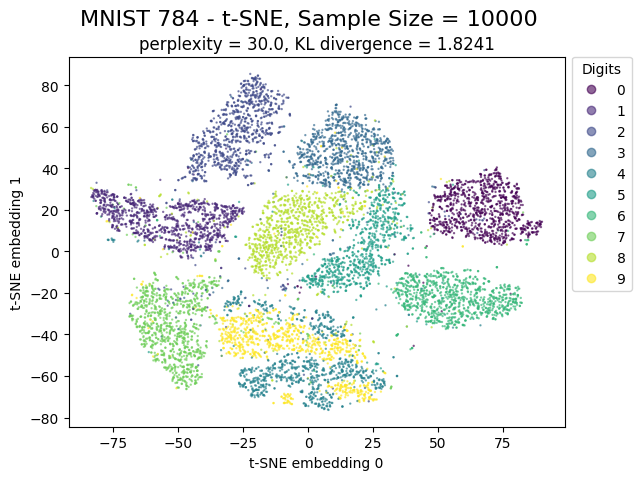

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_emb[:,0], X_emb[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('t-SNE embedding 1')
ax.set_xlabel('t-SNE embedding 0')
fig.suptitle(f"MNIST 784 - t-SNE, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"perplexity = {perplexity}, KL divergence = {kl_div:.4f}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## UMAP Visualization

In [ ]:
%%time
n_comp = 2
n_neighb = 15
min_dist = 0.1
mapper = umap.UMAP(n_components=n_comp, n_neighbors=n_neighb, min_dist=min_dist, random_state=random_state)
X_emb = mapper.fit_transform(X_samp)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 47.5 s, sys: 547 ms, total: 48 s
Wall time: 46.6 s


In [ ]:
print(f"Embeddings shape: {X_emb.shape}")

Embeddings shape: (10000, 2)


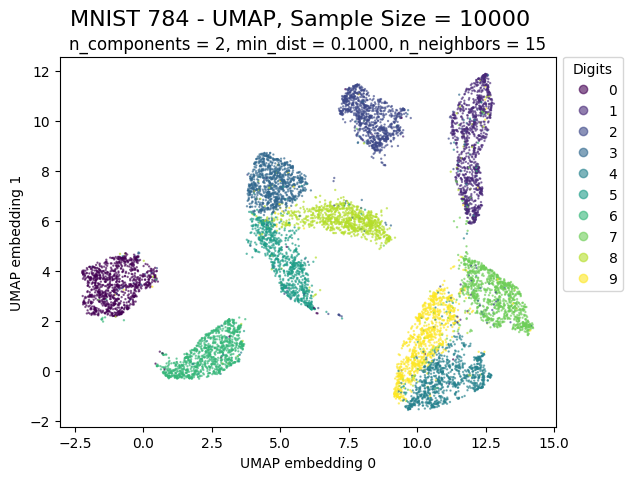

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_emb[:,0], X_emb[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('UMAP embedding 1')
ax.set_xlabel('UMAP embedding 0')
fig.suptitle(f"MNIST 784 - UMAP, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"n_components = {n_comp}, min_dist = {min_dist:.4f}, n_neighbors = {n_neighb}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## PCA Dimensionality Reduction

In [ ]:
%%time
n_clust = 10
n_comp = 2

pca = PCA(n_components=n_comp)
X_samp_reduced = pca.fit_transform(X_samp)

CPU times: user 960 ms, sys: 106 ms, total: 1.07 s
Wall time: 582 ms


In [ ]:
print(f"PCA shape: {X_samp_reduced.shape}")

PCA shape: (10000, 2)


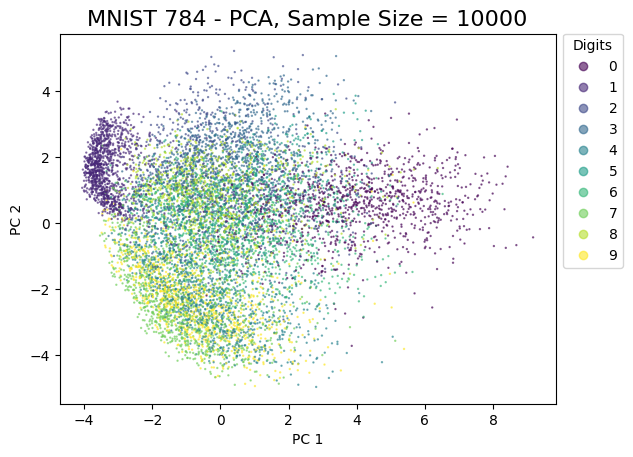

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_samp_reduced[:,0], X_samp_reduced[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('PC 2')
ax.set_xlabel('PC 1')
ax.set_title(f"MNIST 784 - PCA, Sample Size = {sample_size}", ha='center', fontsize=16)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## Singular Value Decomposition - SVD

In [27]:
%%time
n_comps = 2

tsvd = TruncatedSVD(n_components=n_comps, n_iter=8, random_state=random_state)
X_samp_reduced = tsvd.fit_transform(X_samp)

CPU times: user 1.02 s, sys: 474 ms, total: 1.49 s
Wall time: 1.1 s


In [28]:
print(f"SVD shape: {X_samp_reduced.shape}")

SVD shape: (10000, 2)


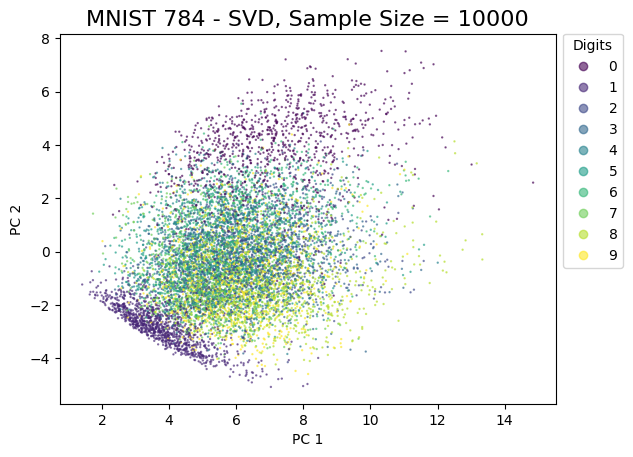

In [29]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_samp_reduced[:,0], X_samp_reduced[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('PC 2')
ax.set_xlabel('PC 1')
ax.set_title(f"MNIST 784 - SVD, Sample Size = {sample_size}", ha='center', fontsize=16)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## MDS - Multi Dimensional Scaling

In [ ]:
%%time
rand_idx = np.random.choice(np.arange(X.shape[0]), size=10000, replace=False)
X_samp_mds = np.take(X, rand_idx, axis=0)
y_samp_mds = np.take(X, rand_idx)

n_comp = 2
mds = MDS(n_components=n_comp, n_init=1, n_jobs=2, max_iter=120, random_state=random_state)
X_transformed = mds.fit_transform(X_samp_mds)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


CPU times: user 10.7 s, sys: 2.75 s, total: 13.5 s
Wall time: 6min 31s


In [ ]:
print(f"MDS embedding shape: {X_transformed.shape}")

MDS embedding shape: (10000, 2)


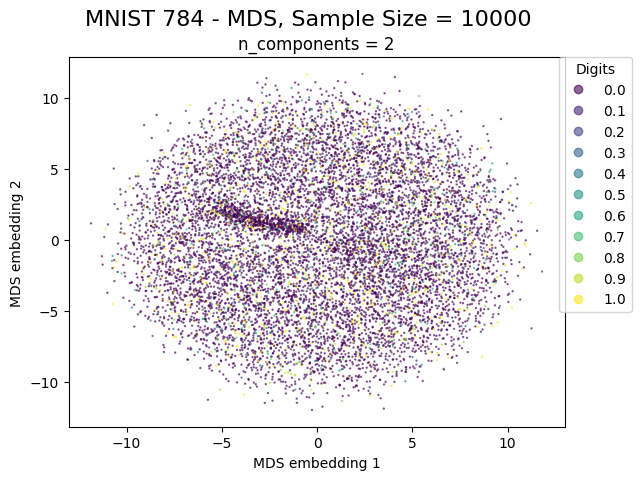

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], alpha=0.6, c=y_samp_mds, label=y_samp_mds, s=0.5)
ax.set_ylabel('MDS embedding 2')
ax.set_xlabel('MDS embedding 1')
fig.suptitle(f"MNIST 784 - MDS, Sample Size = 10000", ha='center', fontsize=16)
plt.title(f"n_components = {n_comp}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## Isomap

In [ ]:
%%time
n_neighbors = 30
n_comp = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_comp)
X_transformed = isomap.fit_transform(X_samp)

CPU times: user 2min 33s, sys: 4.14 s, total: 2min 37s
Wall time: 2min 37s


In [ ]:
print(f"Isomap embedding shape: {X_transformed.shape}")

Isomap embedding shape: (10000, 2)


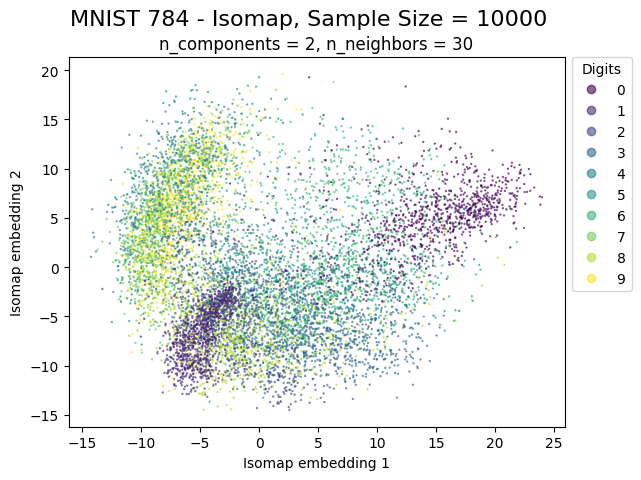

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('Isomap embedding 2')
ax.set_xlabel('Isomap embedding 1')
fig.suptitle(f"MNIST 784 - Isomap, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"n_components = {n_comp}, n_neighbors = {n_neighbors}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## Linear Discriminant Analysis - LDA

In [19]:
%%time
n_comps = 2

lda = LinearDiscriminantAnalysis(n_components=n_comps)
X_transformed = lda.fit_transform(X_samp, y_samp)

CPU times: user 5.02 s, sys: 958 ms, total: 5.98 s
Wall time: 6.34 s


In [20]:
print(f"LDA embedding shape: {X_transformed.shape}")

LDA embedding shape: (10000, 2)


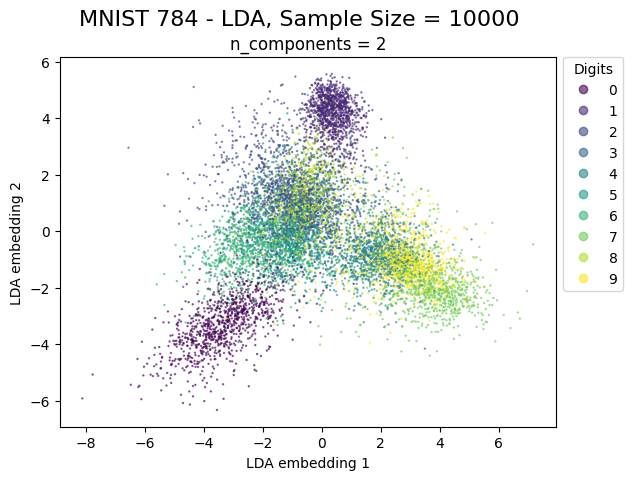

In [21]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('LDA embedding 2')
ax.set_xlabel('LDA embedding 1')
fig.suptitle(f"MNIST 784 - LDA, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"n_components = {n_comps}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## NMF

In [48]:
%%time
n_comps = 2
nmf = NMF(n_components=n_comps, random_state=random_state)
X_transformed = nmf.fit_transform(X_samp)

CPU times: user 5.55 s, sys: 384 ms, total: 5.93 s
Wall time: 3.08 s


In [49]:
print(f"NMF embedding shape: {X_transformed.shape}")

NMF embedding shape: (10000, 2)


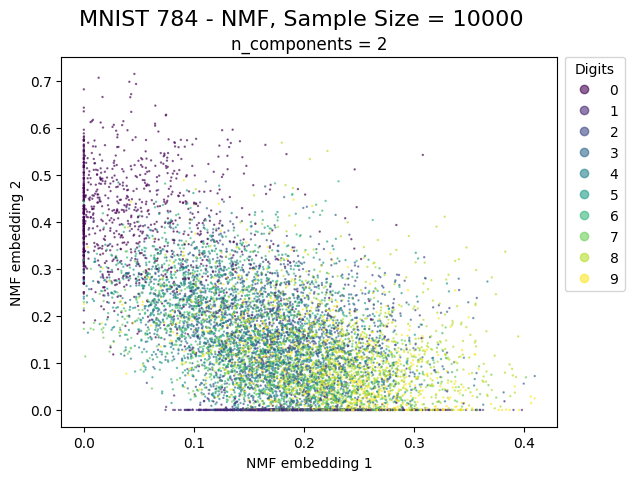

In [50]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('NMF embedding 2')
ax.set_xlabel('NMF embedding 1')
fig.suptitle(f"MNIST 784 - NMF, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"n_components = {n_comps}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()

## NCA

In [45]:
%%time
n_comps = 2
nca = NeighborhoodComponentsAnalysis(n_components=n_comps, init='pca', random_state=random_state)
X_transformed = nca.fit_transform(X_samp, y_samp)

CPU times: user 4min 37s, sys: 1min 10s, total: 5min 48s
Wall time: 5min 30s


In [46]:
print(f"NCA embedding shape: {X_transformed.shape}")

NCA embedding shape: (10000, 2)


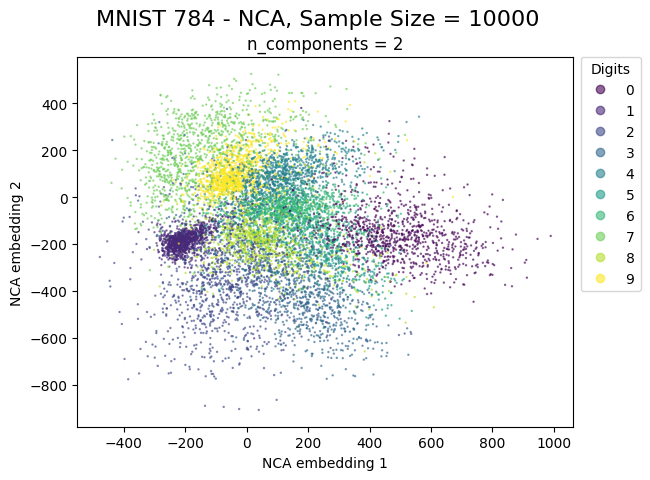

In [47]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], alpha=0.6, c=y_samp, label=y_samp, s=0.5)
ax.set_ylabel('NCA embedding 2')
ax.set_xlabel('NCA embedding 1')
fig.suptitle(f"MNIST 784 - NCA, Sample Size = {sample_size}", ha='center', fontsize=16)
plt.title(f"n_components = {n_comps}", ha='center', fontsize=12)
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.15, 1.02), loc='upper right', title="Digits")

plt.show()